In [67]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
from plotnine import *
import folium



In [21]:
sidata = pd.read_csv("https://raw.githubusercontent.com/nschettini/CUNY-MSDS-DATA-607/master/NYPD_Motor_Vehicle_Collisions%202017.csv")

In [9]:
sidata.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/20/2017,7:00,STATEN ISLAND,10306,40.570465,-74.10977,"(40.570465, -74.10977)",HYLAN BOULEVARD,NEW DORP LANE,NaN,...,Unspecified,NaN,NaN,NaN,3635600,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1,03/20/2017,8:00,STATEN ISLAND,10309,40.549090,-74.22084,"(40.54909, -74.22084)",VETERANS ROAD WEST,BLOOMINGDALE ROAD,NaN,...,Unspecified,NaN,NaN,NaN,3635743,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
2,03/20/2017,12:28,STATEN ISLAND,10309,40.537933,-74.21623,"(40.537933, -74.21623)",NaN,NaN,53 MARISA CIRCLE,...,Unspecified,NaN,NaN,NaN,3635748,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
3,03/20/2017,12:55,STATEN ISLAND,10312,40.535355,-74.15594,"(40.535355, -74.15594)",KING STREET,RICHMOND AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3635794,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
4,03/20/2017,9:50,STATEN ISLAND,10312,40.560410,-74.16975,"(40.56041, -74.16975)",NaN,NaN,3229 RICHMOND AVENUE,...,Unspecified,NaN,NaN,NaN,3635796,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


In [22]:
sidata.drop(columns=['OFF STREET NAME', 'UNIQUE KEY'])

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/20/2017,7:00,STATEN ISLAND,10306,40.570465,-74.109770,"(40.570465, -74.10977)",HYLAN BOULEVARD,NEW DORP LANE,0,...,Following Too Closely,Unspecified,NaN,NaN,NaN,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1,03/20/2017,8:00,STATEN ISLAND,10309,40.549090,-74.220840,"(40.54909, -74.22084)",VETERANS ROAD WEST,BLOOMINGDALE ROAD,0,...,Turning Improperly,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
2,03/20/2017,12:28,STATEN ISLAND,10309,40.537933,-74.216230,"(40.537933, -74.21623)",NaN,NaN,0,...,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
3,03/20/2017,12:55,STATEN ISLAND,10312,40.535355,-74.155940,"(40.535355, -74.15594)",KING STREET,RICHMOND AVENUE,0,...,Unspecified,Unspecified,NaN,NaN,NaN,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
4,03/20/2017,9:50,STATEN ISLAND,10312,40.560410,-74.169750,"(40.56041, -74.16975)",NaN,NaN,0,...,Unspecified,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
5,03/20/2017,15:10,STATEN ISLAND,10301,NaN,NaN,NaN,NaN,NaN,0,...,Other Vehicular,Unspecified,NaN,NaN,NaN,PICK-UP TRUCK,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN
6,03/20/2017,17:45,STATEN ISLAND,10305,40.604397,-74.069000,"(40.604397, -74.069)",NARROWS ROAD NORTH,FINGERBOARD ROAD,0,...,Following Too Closely,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
7,03/20/2017,12:00,STATEN ISLAND,10310,40.635440,-74.109070,"(40.63544, -74.10907)",DAVIS AVENUE,SOUTH SAINT AUSTINS PLACE,0,...,Unspecified,Unspecified,NaN,NaN,NaN,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
8,03/20/2017,19:01,STATEN ISLAND,10314,40.611427,-74.116844,"(40.611427, -74.116844)",REON AVENUE,SLOSSON AVENUE,0,...,Driver Inattention/Distraction,Unspecified,Unspecified,Unspecified,NaN,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN
9,03/20/2017,22:40,STATEN ISLAND,10301,40.637070,-74.082520,"(40.63707, -74.08252)",NaN,NaN,0,...,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


C:\Users\nicsc\Anaconda3\lib\site-packages\plotnine\stats\stat.py:310: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


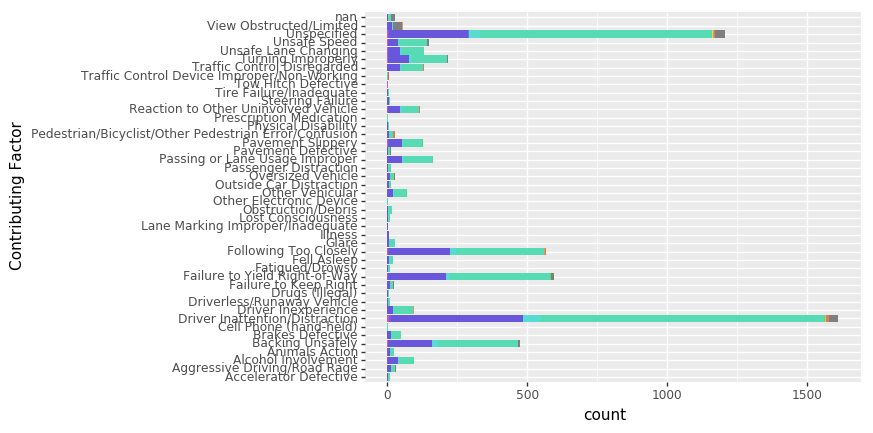

<ggplot: (-9223371931780021511)>

In [60]:
(ggplot(sidata, aes('CONTRIBUTING FACTOR VEHICLE 1')) + 
 geom_bar(aes(fill= 'VEHICLE TYPE CODE 1'), show_legend=False) + 
 coord_flip() + 
 xlab("Contributing Factor")
)

In [77]:
from folium.plugins import HeatMap

In [92]:
maps = folium.Map(location=[40.579021, -74.151535])

sidata = sidata.dropna()

sidata['LATITUDE'] = sidata['LATITUDE'].astype(float)
sidata['LONGITUDE'] = sidata['LONGITUDE'].astype(float)

heat_data = [[column['LATITUDE'],column['LONGITUDE']] for index, column in sidata.iterrows()]

HeatMap(heat_data).add_to(maps)

maps